In [1]:
# main file that works with Simulation.py

In [1]:
import cv2 as cv
import Simulation as S
from roi_config import rois
from scipy.optimize import least_squares
import numpy as np

In [9]:
import importlib
importlib.reload(S)

<module 'Simulation' from 'c:\\Users\\alber\\OneDrive\\Desktop\\Sim Fol\\Simulation.py'>

In [3]:
# Load whichever image you want
img_path = "images/Feb 9-1D.jpg"

img_bgr = cv.imread(img_path)
gray = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)

In [4]:
pts = S.reflec_pts_cam(gray, show=False)   # show=True if you want the ROI plots
pts

{'M1': [[374.56944444444446, 568.3009259259259],
  [384.300395256917, 706.1620553359684]],
 'M2': [[1594.8175675675675, 307.0405405405405],
  [1601.7397260273972, 326.04794520547944]],
 'M3': [[318.4473684210526, 276.0], [298.77027027027026, 349.35135135135135]],
 'M4': [[1579.8761061946902, 756.8805309734513]]}

In [5]:
# Initialize mirror parameters:
M1 = [160, 109, 96.8312]
M2 = [20, 75, 96.9015]
M3 = [180, 71, 81.919]
M4 = [40, 117, 81.119]

NOT CLIPPED, room to spare:  2.3206922094099056 mm
Laser Path: [(0, 100), (161.07815591882658, 100.0), (21.092683891285475, 65.97252847346545), (179.34132220181854, 66.3608607973605), (38.52275910844779, 107.54602702559015), (160.5465957431594, 104.43724464844698), (21.00123554760816, 66.72805102237442), (178.87741465806064, 63.09350963023574), (-787.75309758636, 319.26816254907726)]
Total Laser Length: 1219.6913894315412 mm
Total Number of Reflection (N_R) =  7


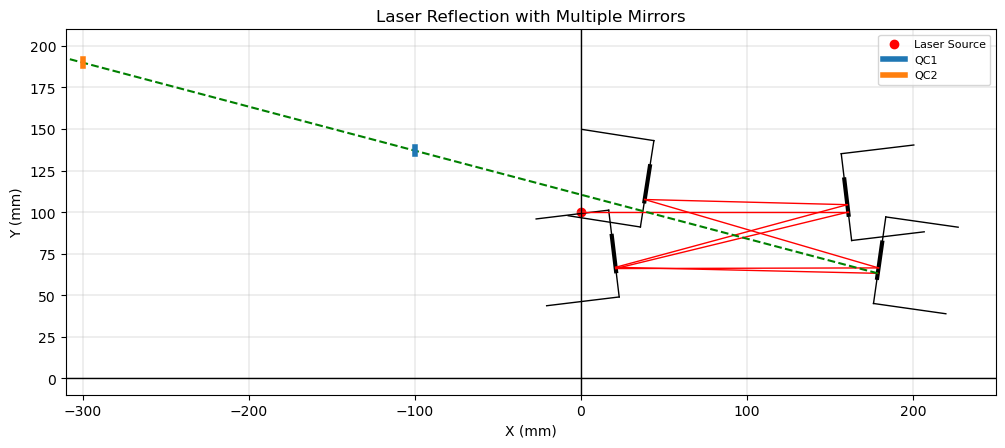

In [13]:
S.simulation(M1[0], M1[1], #M1, (x,y)
          M2[0], M2[1], #M2, (x,y)
          M3[0], M3[1], #M3, (x,y)
          M4[0], M4[1], #M4, (x,y)
          M1[2], M2[2], M3[2], M4[2]) # Angle from positive x-axis (M1, M2, M3, M4)

In [6]:
M1y, M2y, M3y, M4y = 109, 75, 71, 117 # simulation units (mm)

In [7]:
reflec_cam0 = S.reflec_pts_cam(gray, show=False)  # grouped dict now
K_by_mirror = {name: len(reflec_cam0[name]) for name in rois.keys()}

K_by_mirror

{'M1': 2, 'M2': 2, 'M3': 2, 'M4': 1}

In [11]:
%%time
# Initial guess
theta0 = np.array([M1[0], M2[0], M3[0], M4[0], M1[2], M2[2], M3[2], M4[2]], dtype=float)

res = least_squares(
    fun=lambda th: S.residuals(th, img_path_light="images/Feb 9-1L.jpg", img_path_dark="images/Feb 9-1D.jpg", K_by_mirror=K_by_mirror),
    x0=theta0,
    loss="huber",
    f_scale=1.0,
    verbose=2
)

theta_hat = res.x
print("theta_hat:", theta_hat)
print("final exit metric:", S.simulation_identifier(theta_hat[0], M1y, theta_hat[1], M2y, theta_hat[2], M3y, theta_hat[3], M4y,
                                                theta_hat[4], theta_hat[5], theta_hat[6], theta_hat[7]))

Exit angle: -0.26501817361840696
Total length: 1219.6913894315412
y100: 0.001092726338100647
y200: 0.0029100881787940125
y300: 0.0047274500195158
y525: 0.0038165141610591036
Exit angle: -0.26501817361840696
Total length: 1219.6913984873238
y100: 0.0010914374953756578
y200: 0.0029087993360690234
y300: 0.004726161176790811
y525: 0.0038152253183341145
Exit angle: -0.26501817361840696
Total length: 1219.691388299164
y100: 0.0010928859305749938
y200: 0.0029102477712683594
y300: 0.004727609611961725
y525: 0.0038166737535334505
Exit angle: -0.26501817361840696
Total length: 1219.6914003293302
y100: 0.0010941590338973128
y200: 0.0029115208745906784
y300: 0.004728882715312466
y525: 0.0038179468568557695
Exit angle: -0.26501817361840696
Total length: 1219.6913882232882
y100: 0.001092568950241457
y200: 0.0029099307909348227
y300: 0.004727292631628188
y525: 0.0038163567731999137
Exit angle: -0.26501806581021004
Total length: 1219.6913694527354
y100: 0.0010012929452898334
y200: 0.00280787396627602


KeyboardInterrupt: 